In [1]:
import tensorflow as tf
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, AveragePooling2D, Dropout, Flatten, Dense, concatenate
from tensorflow.keras.models import Model
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
!mkdir -p ~/.kaggle
from google.colab import drive
from google.colab import files
# Upload your kaggle.json API key
uploaded = files.upload()

drive.mount('/content/drive')
import os
import shutil
os.environ['KAGGLE_CONFIG_DIR'] = '/content/drive/MyDrive/Machine-learning'

Saving kaggle.json to kaggle.json
Mounted at /content/drive


In [3]:

tabular_data = pd.read_csv('/content/drive/MyDrive/Machine-learning/HAM10000_metadata.csv')

In [4]:
classes = {4: ('nv', ' melanocytic nevi'), 6: ('mel', 'melanoma'), 2 :('bkl', 'benign keratosis-like lesions'), 1:('bcc' , ' basal cell carcinoma'), 5: ('vasc', ' pyogenic granulomas and hemorrhage'), 0: ('akiec', 'Actinic keratoses and intraepithelial carcinomae'),  3: ('df', 'dermatofibroma')}
classes

{4: ('nv', ' melanocytic nevi'),
 6: ('mel', 'melanoma'),
 2: ('bkl', 'benign keratosis-like lesions'),
 1: ('bcc', ' basal cell carcinoma'),
 5: ('vasc', ' pyogenic granulomas and hemorrhage'),
 0: ('akiec', 'Actinic keratoses and intraepithelial carcinomae'),
 3: ('df', 'dermatofibroma')}

In [5]:
data = pd.read_csv('/content/drive/MyDrive/Machine-learning/hmnist_28_28_RGB.csv')

In [6]:
y = data['label']
x = data.drop(columns = ['label'])
len(x )

10015

In [11]:
original_image_height = 28
original_image_width = 28
original_image_channels = 3

# Reshape the images to their original shape
x_original_shape = x_flattened.reshape(-1, original_image_height, original_image_width, original_image_channels)


NameError: ignored

In [10]:
from imblearn.over_sampling import RandomOverSampler
oversample = RandomOverSampler()
x,y  = oversample.fit_resample(x,y)

In [13]:
x = np.array(x).reshape(-1,28,28,3)
print('Shape of X :',x.shape)

Shape of X : (46935, 28, 28, 3)


In [14]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

x_standardized = (x - np.mean(x)) / np.std(x)
# Reshape the standardized 'x' if it has more than two dimensions
num_samples = x_standardized.shape[0]
x_flattened = x_standardized.reshape(num_samples, -1)

# Split the data into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(x_flattened, y, test_size=0.2, random_state=1)

In [22]:
original_image_height = 28
original_image_width = 28
original_image_channels = 3

# Reshape the images to their original shape
x_original_shape = x_flattened.reshape(-1, original_image_height, original_image_width, original_image_channels)

In [23]:

# Split the data into training, validation, and test sets
X_train, X_temp, Y_train, Y_temp = train_test_split(x_original_shape, y, test_size=0.4, random_state=1)
X_val, X_test, Y_val, Y_test = train_test_split(X_temp, Y_temp, test_size=0.5, random_state=1)


In [24]:
def inception_module(x, filters):
    # 1x1 Convolution
    conv1x1 = Conv2D(filters[0], (1, 1), padding='same', activation='relu')(x)

    # 3x3 Convolution
    conv3x3 = Conv2D(filters[1], (3, 3), padding='same', activation='relu')(x)

    # 5x5 Convolution
    conv5x5 = Conv2D(filters[2], (5, 5), padding='same', activation='relu')(x)

    # MaxPooling
    maxpool = MaxPooling2D((3, 3), strides=(1, 1), padding='same')(x)
    maxpool_conv = Conv2D(filters[3], (1, 1), padding='same', activation='relu')(maxpool)

    # Concatenate
    concatenated = concatenate([conv1x1, conv3x3, conv5x5, maxpool_conv], axis=-1)
    return concatenated



In [25]:
def build_googlenet(input_shape, num_classes):
    inputs = Input(shape=input_shape)

    # First Convolutional Layer
    x = Conv2D(64, (7, 7), strides=(2, 2), padding='same', activation='relu')(inputs)
    x = MaxPooling2D((3, 3), strides=(2, 2), padding='same')(x)

    # Second Convolutional Layer
    x = Conv2D(64, (1, 1), padding='same', activation='relu')(x)
    x = Conv2D(192, (3, 3), padding='same', activation='relu')(x)
    x = MaxPooling2D((3, 3), strides=(2, 2), padding='same')(x)

    # Inception Modules
    x = inception_module(x, [64, 128, 32, 32])
    x = inception_module(x, [128, 192, 96, 64])

    # ... Add more inception modules as needed

    # Fully Connected Layers
    x = AveragePooling2D((4, 4), strides=(1, 1))(x)
    x = Flatten()(x)
    x = Dense(256, activation='relu')(x)
    x = Dropout(0.5)(x)
    outputs = Dense(num_classes, activation='softmax')(x)

    model = Model(inputs, outputs)
    return model


In [27]:

# Build the GoogleNet model
input_shape = (28, 28, 3)
num_classes = 7
google_net_model = build_googlenet(input_shape, num_classes)
google_net_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = google_net_model.fit(X_train, Y_train, validation_data=(X_val, Y_val), batch_size=128, epochs=30)

Epoch 1/30
221/221 [==============================] - 226s 1s/step - loss: 1.2635 - accuracy: 0.4940 - val_loss: 1.0404 - val_accuracy: 0.6047
Epoch 2/30
221/221 [==============================] - 227s 1s/step - loss: 0.6891 - accuracy: 0.7411 - val_loss: 1.3138 - val_accuracy: 0.5892
Epoch 3/30
221/221 [==============================] - 219s 988ms/step - loss: 0.5197 - accuracy: 0.8019 - val_loss: 3.6038 - val_accuracy: 0.4480
Epoch 4/30
221/221 [==============================] - 228s 1s/step - loss: 0.5178 - accuracy: 0.8193 - val_loss: 0.2921 - val_accuracy: 0.8889
Epoch 5/30
221/221 [==============================] - 227s 1s/step - loss: 0.2441 - accuracy: 0.9098 - val_loss: 0.2708 - val_accuracy: 0.9010
Epoch 6/30
221/221 [==============================] - 227s 1s/step - loss: 0.2020 - accuracy: 0.9278 - val_loss: 0.2447 - val_accuracy: 0.9155
Epoch 7/30
221/221 [==============================] - 228s 1s/step - loss: 0.1506 - accuracy: 0.9464 - val_loss: 0.1907 - val_accuracy: 0.9

294/294 [==============================] - 14s 46ms/step - loss: 0.1762 - accuracy: 0.9650
Test Accuracy: 0.9649515151977539


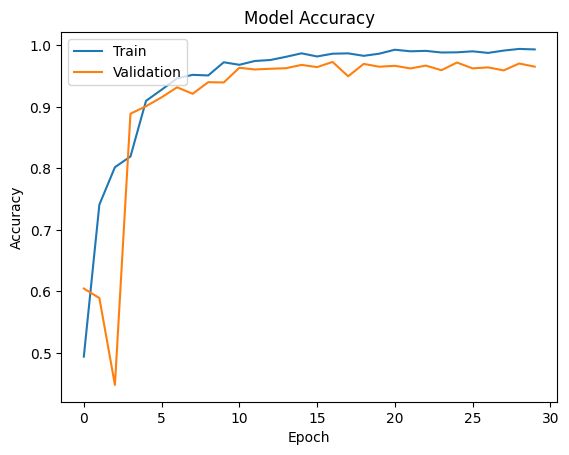

In [28]:
loss, accuracy = google_net_model.evaluate(X_test, Y_test)
print("Test Accuracy:", accuracy)

# Plot training history
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')

plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()


In [33]:
# Calculate individual class accuracy
from sklearn.metrics import confusion_matrix
# Use the trained model to predict on the test data
y_pred = google_net_model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)

# Calculate confusion matrix
cm = confusion_matrix(Y_test, y_pred_classes)

# Calculate individual class accuracy
class_accuracy = cm.diagonal() / cm.sum(axis=1)

for i, acc in enumerate(class_accuracy):
    print(f"Class {i}: Accuracy = {acc:.4f}")

294/294 [==============================] - 19s 63ms/step
Class 0: Accuracy = 0.9977
Class 1: Accuracy = 0.9841
Class 2: Accuracy = 0.9727
Class 3: Accuracy = 1.0000
Class 4: Accuracy = 0.8388
Class 5: Accuracy = 1.0000
Class 6: Accuracy = 0.9671


In [34]:
from sklearn.metrics import confusion_matrix

# Get the predicted classes
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)

# Calculate the confusion matrix
confusion_mat = confusion_matrix(Y_test, y_pred_classes)

print("Confusion Matrix:")
print(confusion_mat)


NameError: ignored